## Imports

In [123]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import string
string.punctuation 
print (string.punctuation) 
stop_words = stopwords.words('english')
# -*- coding: utf-8 -*-
punctuation = [ c for c in string.punctuation ] + [u'\u201c',u'\u201d',u'\u2018',u'\u2019']
import matplotlib.pyplot as plt
import re

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jennatan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from top2vec import Top2Vec

/Users/jennatan/.pyenv/versions/3.8.12/envs/nlp_sentiment/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read data

In [80]:
data = pd.read_csv('20k_2008.csv')

In [81]:
data_df = data.copy()

In [82]:
data_df.head()

Unnamed: 0                   Datetime             Tweet Id  \
0          0  2022-06-08 16:00:06+00:00  1534565944374267909   
1          1  2022-06-08 12:56:00+00:00  1534519612200562689   
2          2  2022-06-08 01:30:08+00:00  1534347009406251008   
3          3  2022-06-07 11:37:57+00:00  1534137584338845696   
4          4  2022-06-05 03:29:56+00:00  1533289994584002561   

                                                Text       Username  \
0  Rwanda policy is having 'NO impact' on migrant...    DailyMailUK   
1  Asylum seeker claims UK hotel stay is 'worse t...  Daily_Express   
2  More than half the 130 asylum-seekers facing f...     MailOnline   
3  'Rwanda plan is NOT working': 80 migrants land...    DailyMailUK   
4  Anger as hundreds of refugee children from Ukr...     MailOnline   

   Like Count  
0         2.0  
1         8.0  
2         8.0  
3         5.0  
4        16.0

## Preprocessing

In [83]:
def remove_punc(text):
    txt=text
    for punc in punctuation:
        txt = txt.replace(punc, " ")
    txt = txt.lower()
    return txt 

def remove_URL_and_HTML(row):
    row = re.sub(r'https.*$', "", row)
    return row

def remove_stopwords(row):
    row = word_tokenize(row)
    return ' '.join(w for w in row if not w in stop_words)

def preprocessing(col):
    col = col.astype(str)
    punctuation_list = col.apply(remove_punc)
    URL = punctuation_list.apply(remove_URL_and_HTML)
    word_tokens = URL.apply(remove_stopwords)                                           
    return word_tokens

In [84]:
data_df_no_duplicates = data_df.drop_duplicates(subset='Tweet Id', keep="first")

In [85]:
data_df_no_duplicates["Tweet Id"].nunique()

17153

In [86]:
data_df_no_duplicates.head()

Unnamed: 0                   Datetime             Tweet Id  \
0          0  2022-06-08 16:00:06+00:00  1534565944374267909   
1          1  2022-06-08 12:56:00+00:00  1534519612200562689   
2          2  2022-06-08 01:30:08+00:00  1534347009406251008   
3          3  2022-06-07 11:37:57+00:00  1534137584338845696   
4          4  2022-06-05 03:29:56+00:00  1533289994584002561   

                                                Text       Username  \
0  Rwanda policy is having 'NO impact' on migrant...    DailyMailUK   
1  Asylum seeker claims UK hotel stay is 'worse t...  Daily_Express   
2  More than half the 130 asylum-seekers facing f...     MailOnline   
3  'Rwanda plan is NOT working': 80 migrants land...    DailyMailUK   
4  Anger as hundreds of refugee children from Ukr...     MailOnline   

   Like Count  
0         2.0  
1         8.0  
2         8.0  
3         5.0  
4        16.0

In [124]:
list_of_xtra_stop_words = ['Djokovic', 'http', 'migration', 'migrants', 'migrates', 'foreigners', 'immigration', 'refugees', 'visas', 'borders', 'deportation', 'deports', 'uk', 'co', 'must', 'set', 'bit', 'one', 'says', 'to','ly', 'get' ]
#len(list_of_xtra_stop_words)

In [10]:
#list_of_xtra_stop_words = ['Djokovic', 'http', 'migrant', 'migration', 'migrants', 'migrates', 'foreign', 'foreigner', 'foreigners', 'immigration', 'immigrant', 'asylum', 'refugee', 'refugees', 'visa', 'visas', 'borders', 'border', 'deport', 'deportation', 'deports', 'uk', 'co', 'must', 'set', 'bit', 'one', 'says', 'to','ly', 'get' ]
#len(list_of_xtra_stop_words)

31

In [103]:
#list_of_xtra_stop_words = ['Djokovic', 'http',  'uk', 'co', 'must', 'set', 'bit', 'one', 'says', 'to','ly', 'get' ]
#len(list_of_xtra_stop_words)

12

In [125]:
stop_words.extend(list_of_xtra_stop_words)

In [126]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [127]:
data_df_no_stopwords = data_df_no_duplicates.copy()

In [128]:
data_df_no_stopwords['preprocessed'] = preprocessing(data_df_no_stopwords['Text'])

In [129]:
data_df_no_stopwords.head()

Unnamed: 0                   Datetime             Tweet Id  \
0          0  2022-06-08 16:00:06+00:00  1534565944374267909   
1          1  2022-06-08 12:56:00+00:00  1534519612200562689   
2          2  2022-06-08 01:30:08+00:00  1534347009406251008   
3          3  2022-06-07 11:37:57+00:00  1534137584338845696   
4          4  2022-06-05 03:29:56+00:00  1533289994584002561   

                                                Text       Username  \
0  Rwanda policy is having 'NO impact' on migrant...    DailyMailUK   
1  Asylum seeker claims UK hotel stay is 'worse t...  Daily_Express   
2  More than half the 130 asylum-seekers facing f...     MailOnline   
3  'Rwanda plan is NOT working': 80 migrants land...    DailyMailUK   
4  Anger as hundreds of refugee children from Ukr...     MailOnline   

   Like Count                                       preprocessed  
0         2.0  rwanda policy impact inspector numbers crossin...  
1         8.0       asylum seeker claims hotel stay worse prison  
2         8.0  half 130 asylum seekers facing first flights r...  
3         5.0  rwanda plan working 80 land dover today despit...  
4        16.0  anger hundreds refugee children ukraine left s...

In [130]:
data_df_no_stopwords = data_df_no_stopwords.drop_duplicates(subset='preprocessed', keep="first")

In [131]:
data_df_no_stopwords.shape

(13176, 7)

In [132]:
list_tweets_2 = [i for i in data_df_no_stopwords['preprocessed']]

## The model

In [133]:
model_5 = Top2Vec(list_tweets_2, workers=-2, speed='deep-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-09 15:46:22,876 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/Users/jennatan/.pyenv/versions/3.8.12/envs/nlp_sentiment/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-09 15:46:23,661 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-09 15:46:31,624 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-09 15:46:33,986 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-09 15:46:52,245 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense are

In [134]:
# The number of topics Top2Vec has found
model_5.get_num_topics()

88

In [135]:
# Reduce number of topics
topic_mapping = model_5.hierarchical_topic_reduction(num_topics=5)
model_5.get_topic_hierarchy()

[[19,
  53,
  41,
  44,
  4,
  62,
  10,
  17,
  55,
  77,
  28,
  65,
  74,
  2,
  40,
  9,
  84,
  68,
  81,
  34,
  80,
  78,
  3],
 [60,
  70,
  0,
  23,
  26,
  37,
  12,
  31,
  36,
  49,
  18,
  51,
  15,
  59,
  75,
  83,
  20,
  52,
  43,
  7],
 [30, 61, 32, 25, 57, 27, 50, 11, 39, 13, 63, 67, 54, 82, 33, 22, 16, 87, 8],
 [6, 64, 45, 69, 24, 47, 58, 79, 85, 66, 29, 86, 72, 5],
 [1, 46, 14, 42, 76, 48, 56, 35, 38, 73, 71, 21]]

### By topics

In [136]:
model_5.get_topics(reduced=True)

(array([['migrant', 'refugee', 'asylum', 'deported', 'deport',
         'immigrants', 'immigrant', 'merkel', 'jailed', 'raped', 'calais',
         'syrian', 'isis', 'illegal', 'labour', 'forced', 'arrested',
         'syria', 'warns', 'visa', 'afghan', 'rescued', 'accused',
         'seekers', 'border', 'trump', 'brexit', 'desperate', 'terror',
         'demands', 'hungary', 'seeker', 'anti', 'france', 'police',
         'claims', 'foreign', 'britain', 'fears', 'brussels', 'admits',
         'lorry', 'boris', 'tory', 'britons', 'irish', 'germany', 'putin',
         'breaking', 'claim'],
        ['calais', 'migrant', 'border', 'deported', 'refugee',
         'immigrants', 'asylum', 'lorry', 'immigrant', 'deport',
         'crossing', 'illegal', 'warns', 'jailed', 'dover', 'desperate',
         'rescued', 'brexit', 'arrested', 'france', 'boats', 'britons',
         'syria', 'syrian', 'hungary', 'isis', 'terror', 'visa',
         'seekers', 'boat', 'labour', 'troops', 'seeker', 'forced',


In [137]:
topic_sizes,topic_nums = model_5.get_topic_sizes(reduced=True)

In [138]:
topic_sizes

array([3884, 2771, 2748, 1917, 1856])

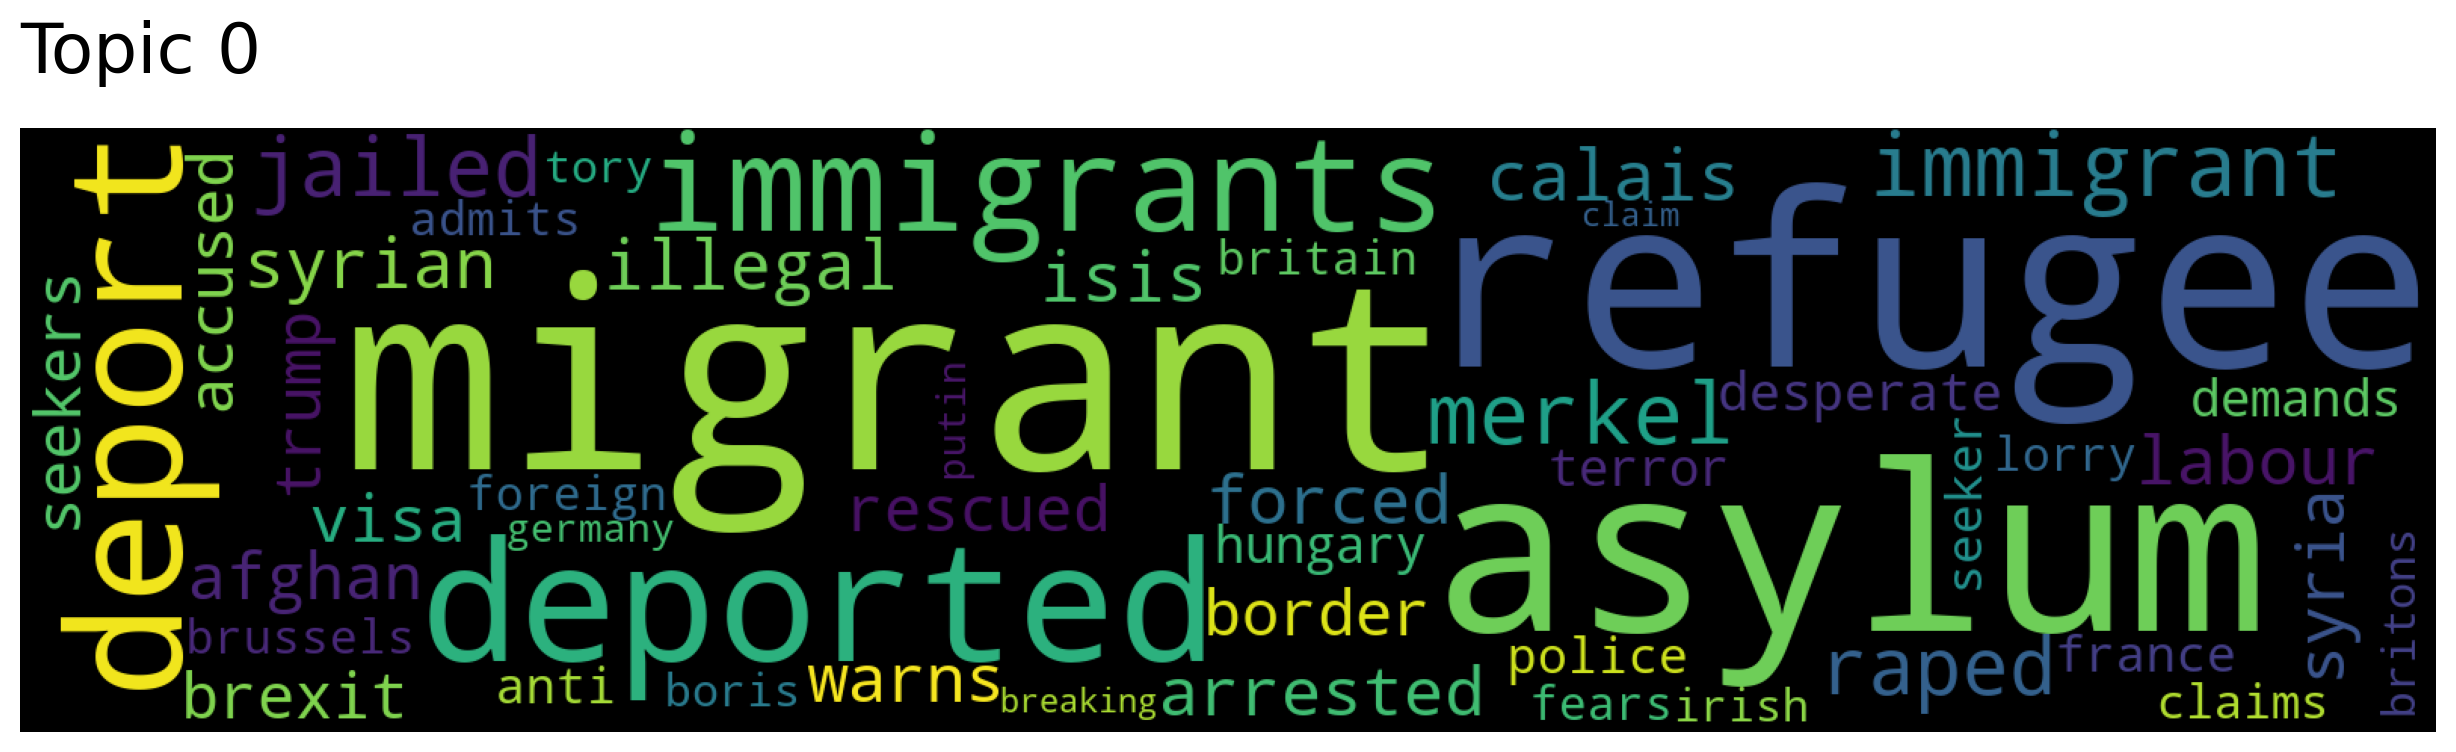

In [139]:
# Top words most semantically similar to the topic with most documents
model_5.generate_topic_wordcloud(reduced=True, topic_num=0)

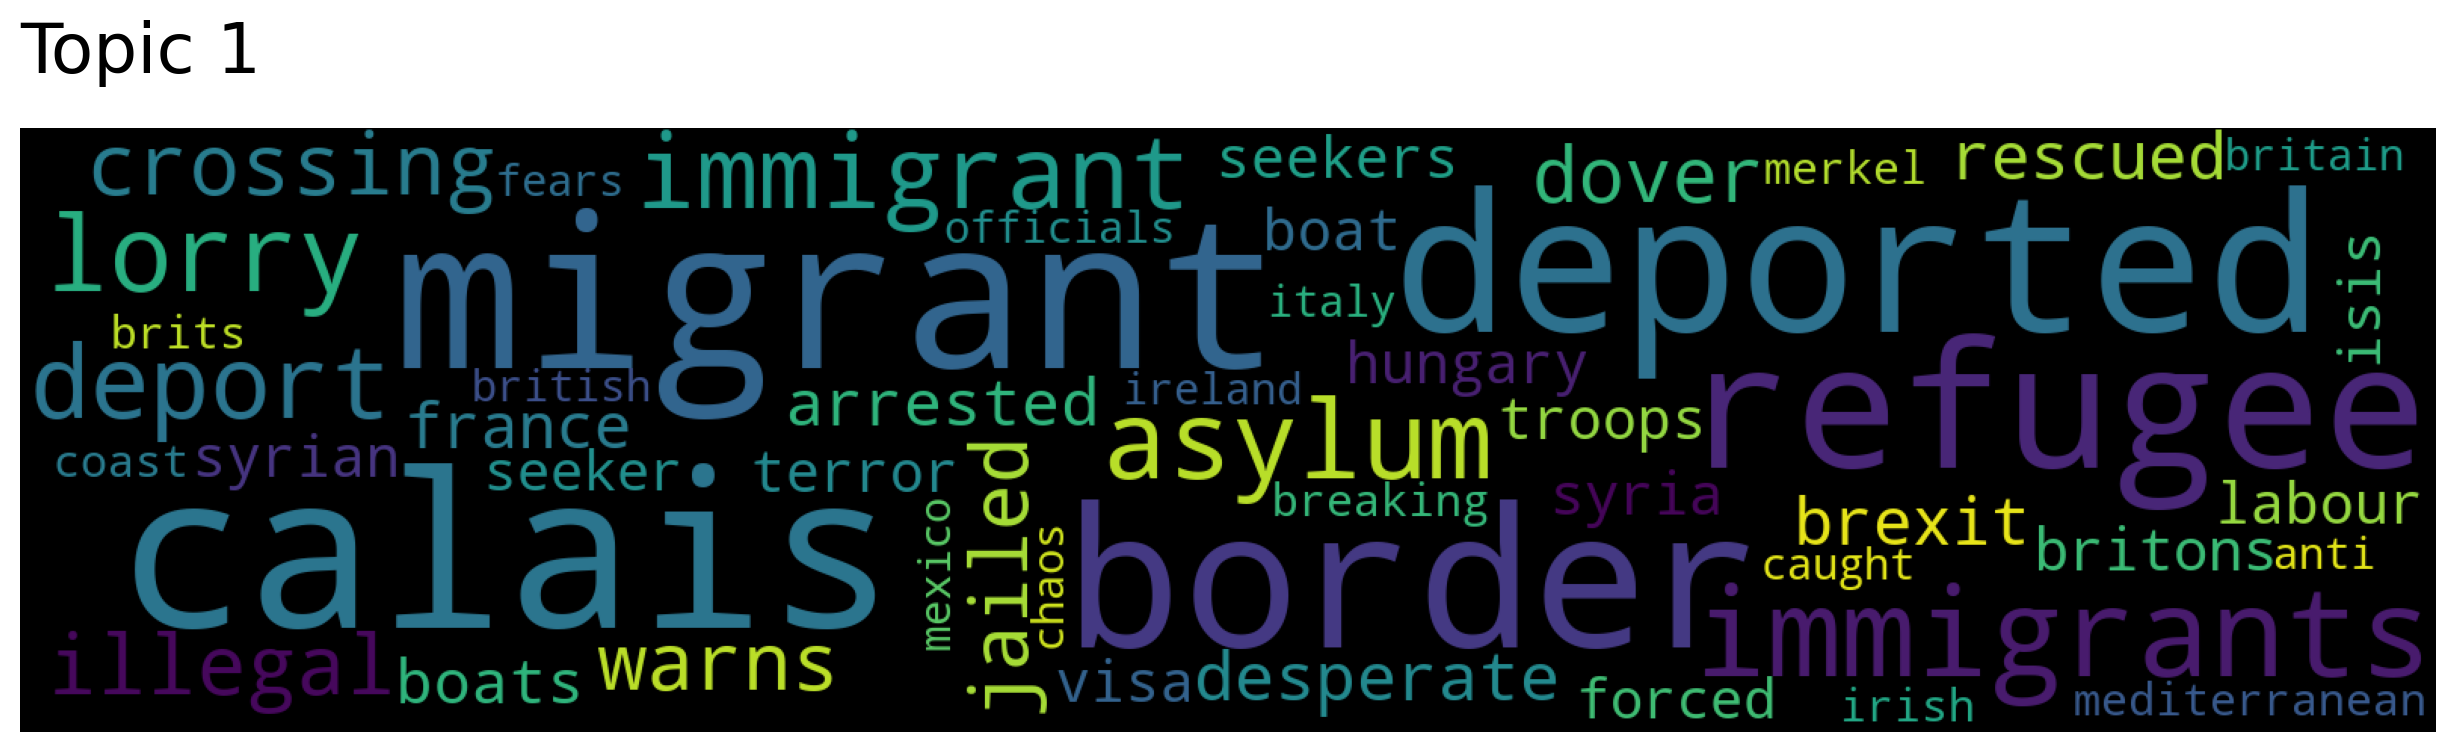

In [140]:
model_5.generate_topic_wordcloud(reduced=True, topic_num=1)

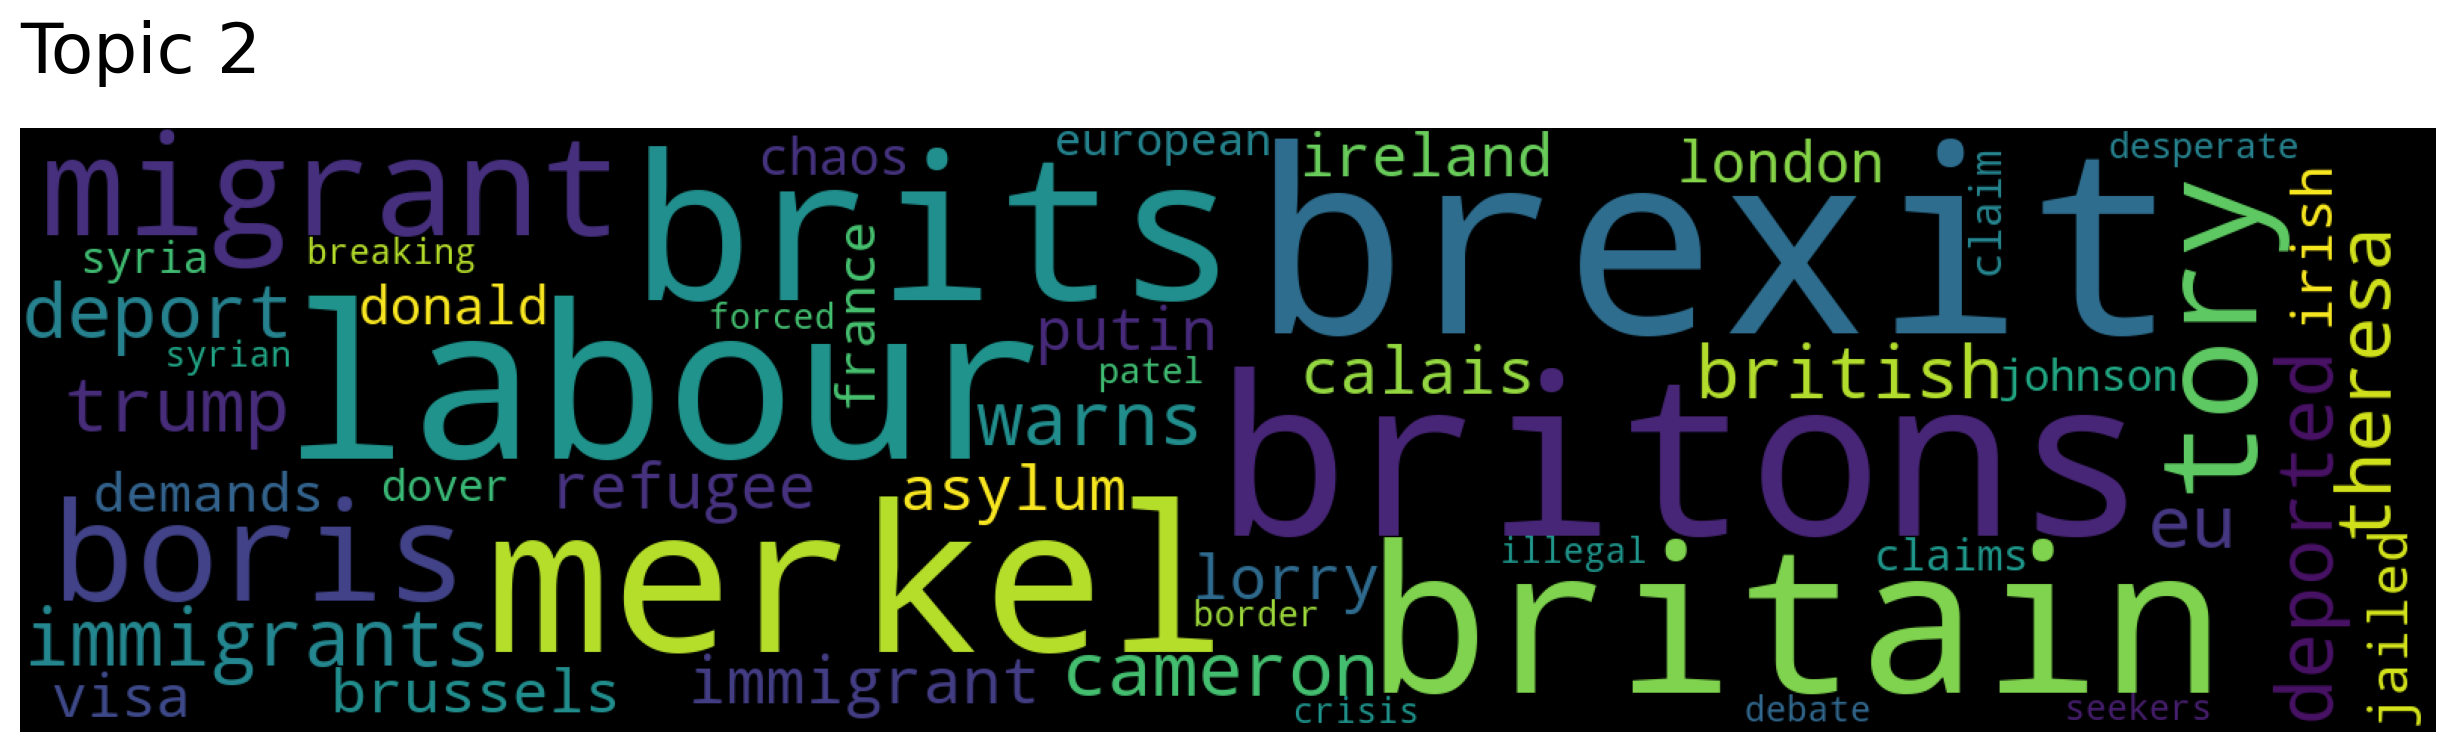

In [141]:
model_5.generate_topic_wordcloud(reduced=True, topic_num=2)

### Topics most associated with keywords

In [146]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["asylum"], num_topics=5)
topic_nums

array([ 2, 74,  3, 28, 65])

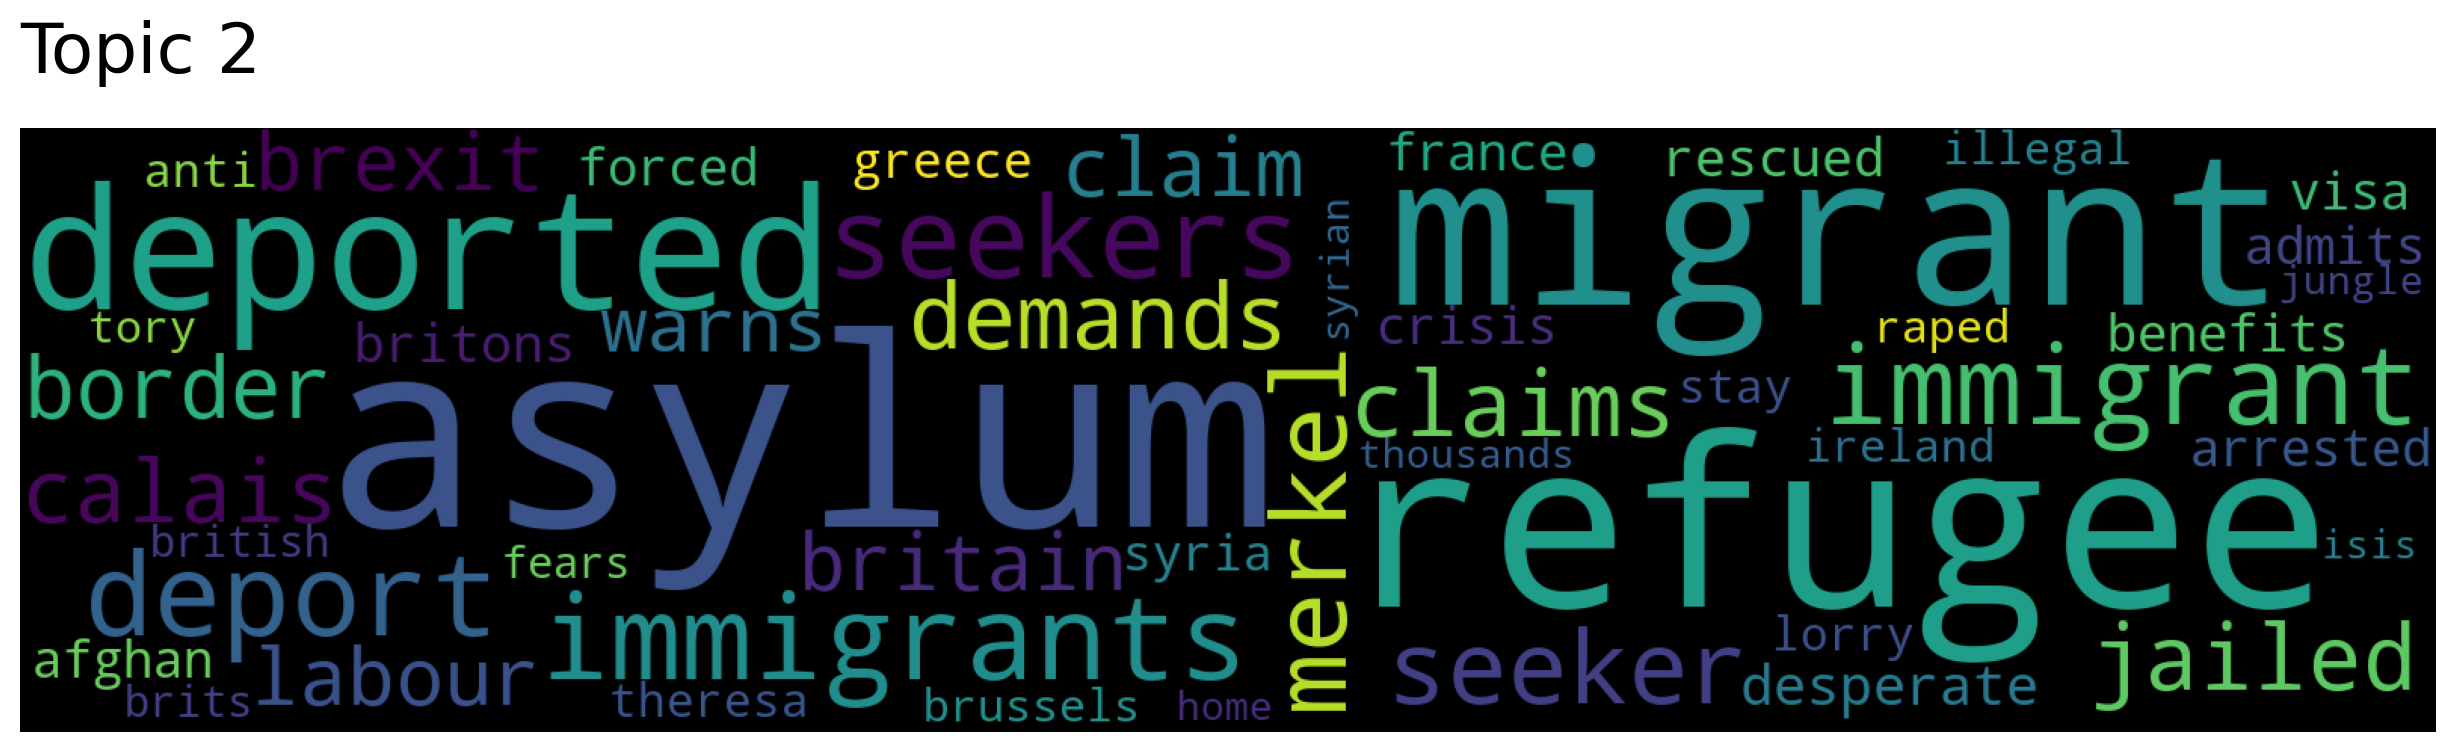

In [147]:
model_5.generate_topic_wordcloud(topic_num=2)

### Search tweets by topic number

In [148]:
documents, document_scores, document_ids = model_5.search_documents_by_topic(topic_num=2, num_docs=10)
documents

array(['45 000 failed asylum seekers given right work britain cvzmkn',
       '45 000 failed asylum seekers given right work britain ampwer',
       'officials admit lost track thousands 30k asylum seekers overstayed',
       'asylum seekers deported commit crime say wvoal2x5',
       'concern plight asylum seekers gvgtgw',
       'exclusive free rail route asylum seekers launched refugee crisis deepens',
       'three failed asylum seekers end leaving britain',
       'asylum chaos appalling truth number failed asylum seekers removed britain plummeting tinyurl com m3hsrh',
       'exclusive failed asylum seekers illegal immigrants given £66million leaving britain obu42owkgh mafeysx58s',
       'asylum seekers deported commit crime say debate wvoal2x5'],
      dtype=object)

In [19]:
documents, document_scores, document_ids = model_5.search_documents_by_topic(topic_num=0, num_docs=5)

In [20]:
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8436, Score: 0.7494311332702637
-----------
infant feared dead man drowns boat capsizes french coast trying cross channel
-----------

Document: 1273, Score: 0.7411535978317261
-----------
feared dead three others rescued boat capsized english channel
-----------

Document: 8536, Score: 0.7361211180686951
-----------
crossing english channel warn britain jump overboard attempt drown boats stopped
-----------

Document: 6307, Score: 0.727732241153717
-----------
300 libyan feared dead mediterranean boat crossing disaster boxedwkaqo 81nhyeoevp
-----------

Document: 10155, Score: 0.7267208695411682
-----------
sink boat crashing tunisian trawler mistook coast guard
-----------



In [38]:
model_5.search_documents_by_keywords(['ukraine'], num_docs= 10)

(array(['poland 450 000 crossed ukraine',
        'ukraine russia pushed back kharkiv driven towards',
        'russia positions 55 000 troops ukraine',
        'scenes poland 450 000 cross ukraine',
        'ukraine could see four million',
        '1 5 million fled ukraine putin invasion',
        'eu give temporary residence permits ukraine russia ukraine live 👉',
        'putin sends 100 000 troops ukraine',
        'eu considering sending army ukraine russia',
        'delegates ukraine russia meeting talks near ukraine belarus 📹 belta'],
       dtype=object),
 array([0.7069, 0.5847, 0.5843, 0.5746, 0.5648, 0.5558, 0.5549, 0.5547,
        0.5533, 0.5468]),
 array([  351,    49, 10137,   348,  7700,  7671,   344,   702,  7955,
          363]))

In [39]:

topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["ukraine"], num_topics=5)
topic_words

[array(['ukraine', 'ukrainian', 'putin', 'russia', 'russian', 'merkel',
        'syria', 'troops', 'boris', 'trump', 'syrian', 'hungary', 'isis',
        'brexit', 'ireland', 'turkey', 'demands', 'irish', 'war', 'crisis',
        'german', 'donald', 'deported', 'warns', 'blasts', 'afghan',
        'brussels', 'officials', 'crossing', 'eu', 'germany', 'attack',
        'calais', 'desperate', 'anti', 'admits', 'police', 'claims',
        'rescued', 'raped', 'bid', 'immigrants', 'attacks', 'european',
        'france', 'italy', 'breaking', 'greek', 'forced', 'chaos'],
       dtype='<U13'),
 array(['ukraine', 'ukrainian', 'russia', 'hungary', 'russian', 'putin',
        'merkel', 'calais', 'germany', 'brussels', 'troops', 'turkey',
        'boris', 'greece', 'ireland', 'deported', 'syria', 'europe',
        'afghan', 'german', 'mediterranean', 'isis', 'mexico',
        'immigrants', 'european', 'italy', 'france', 'eu', 'syrian',
        'trump', 'spain', 'attacks', 'irish', 'blasts', 'brex

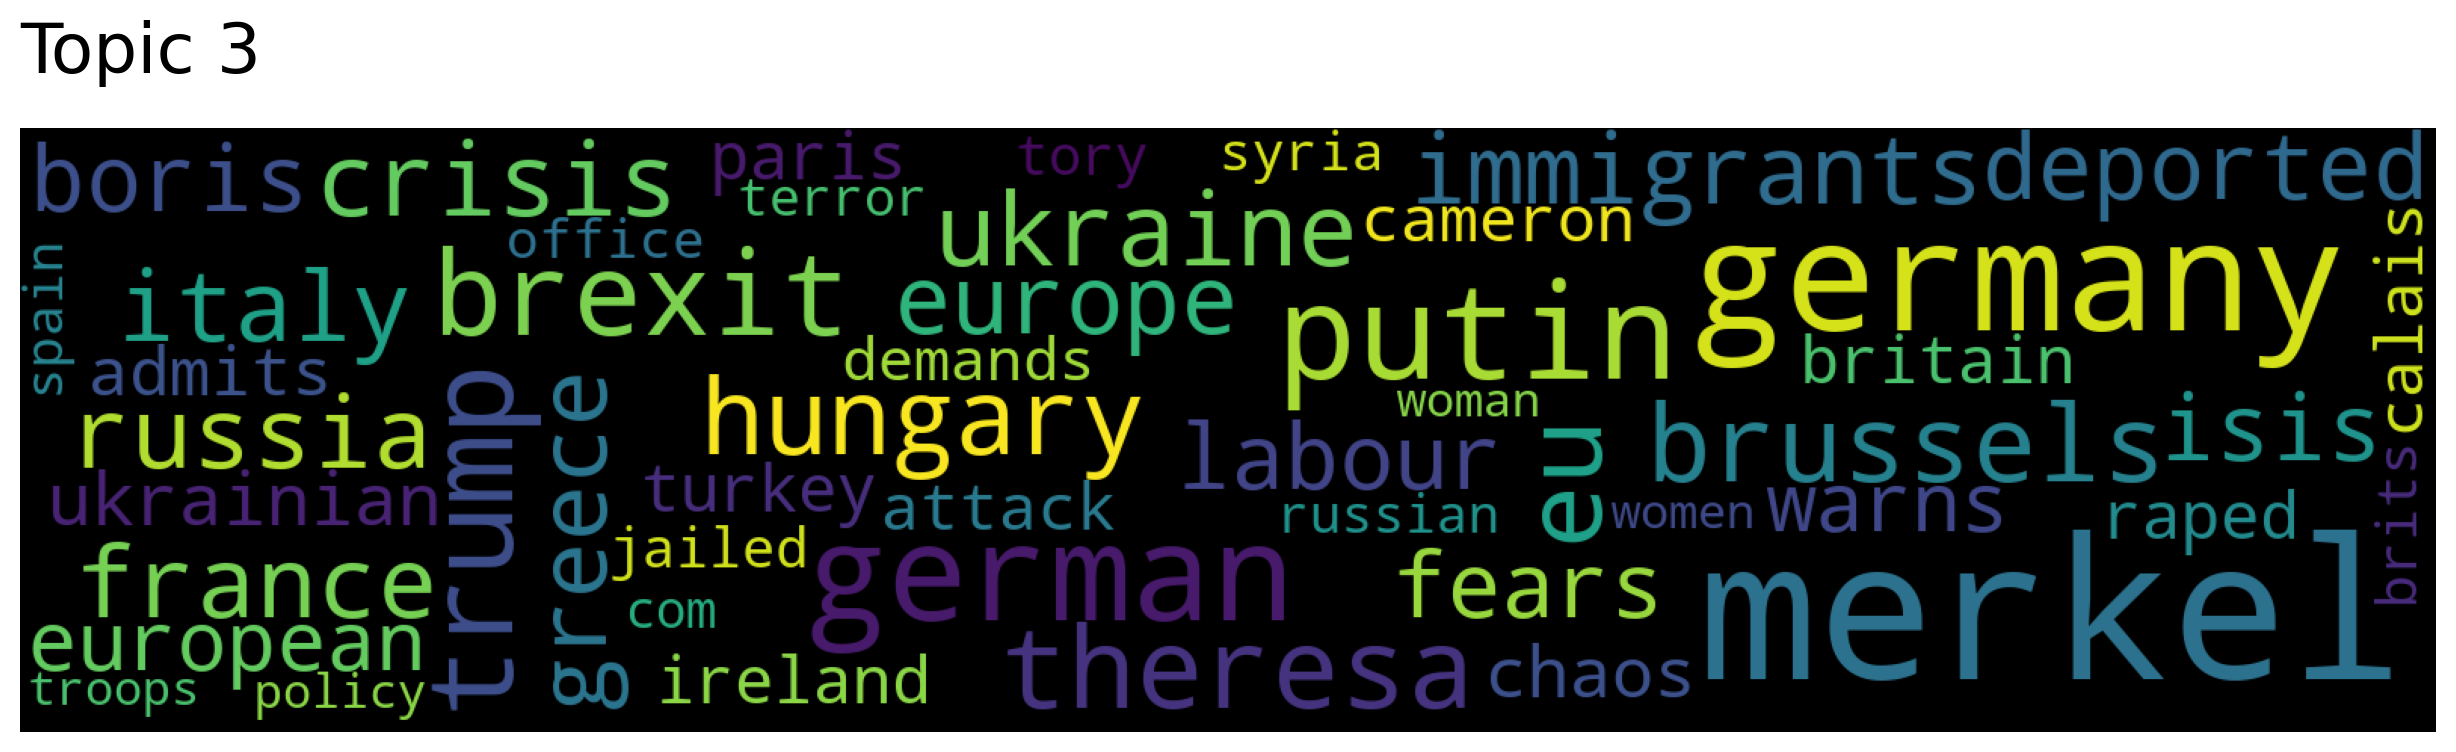

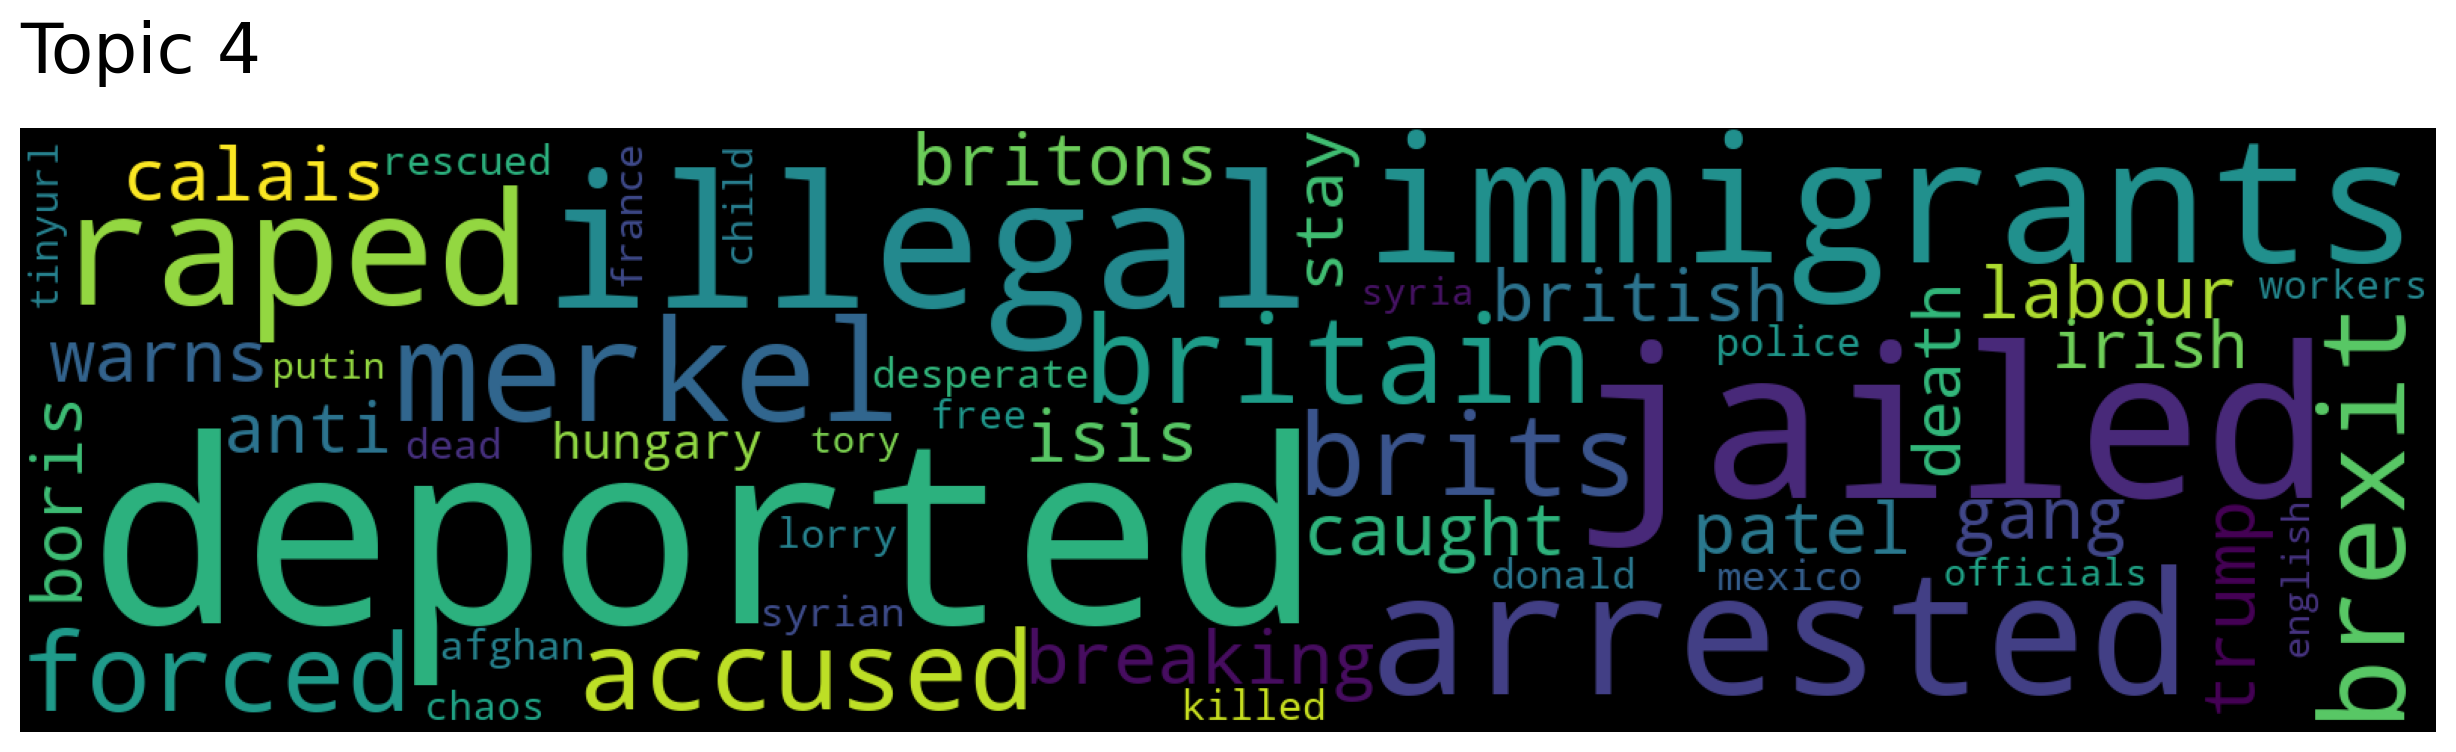

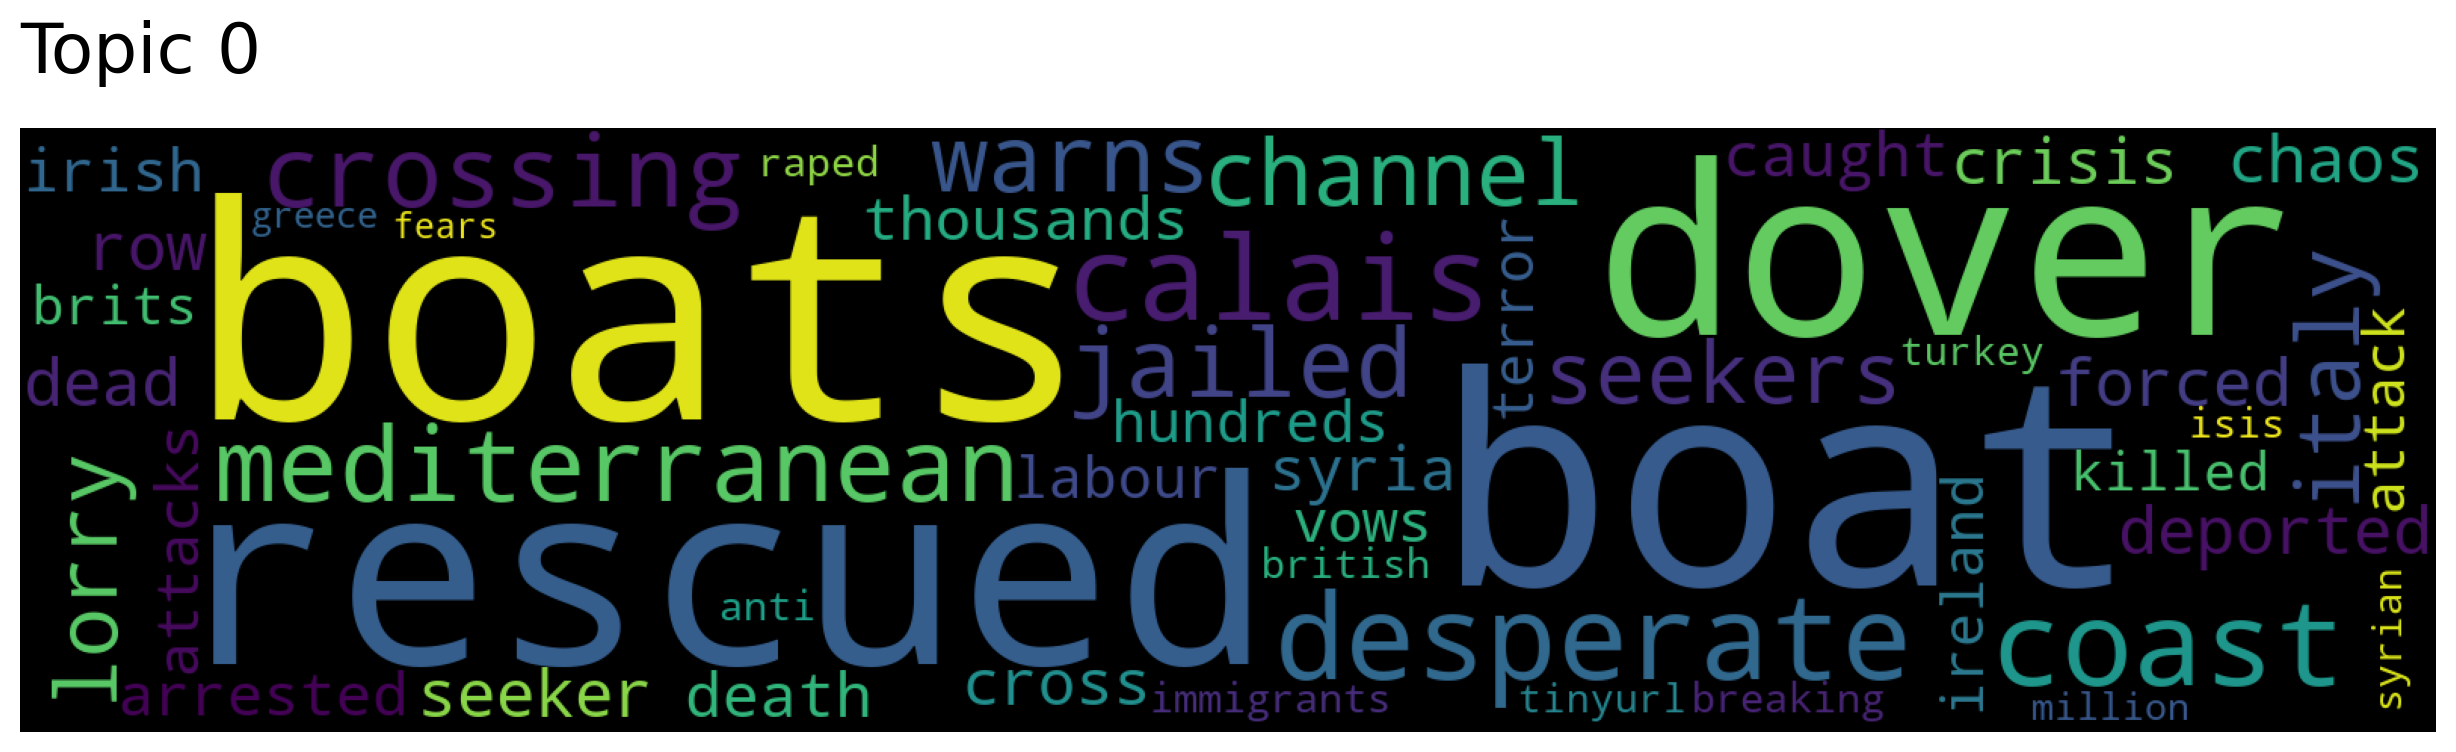

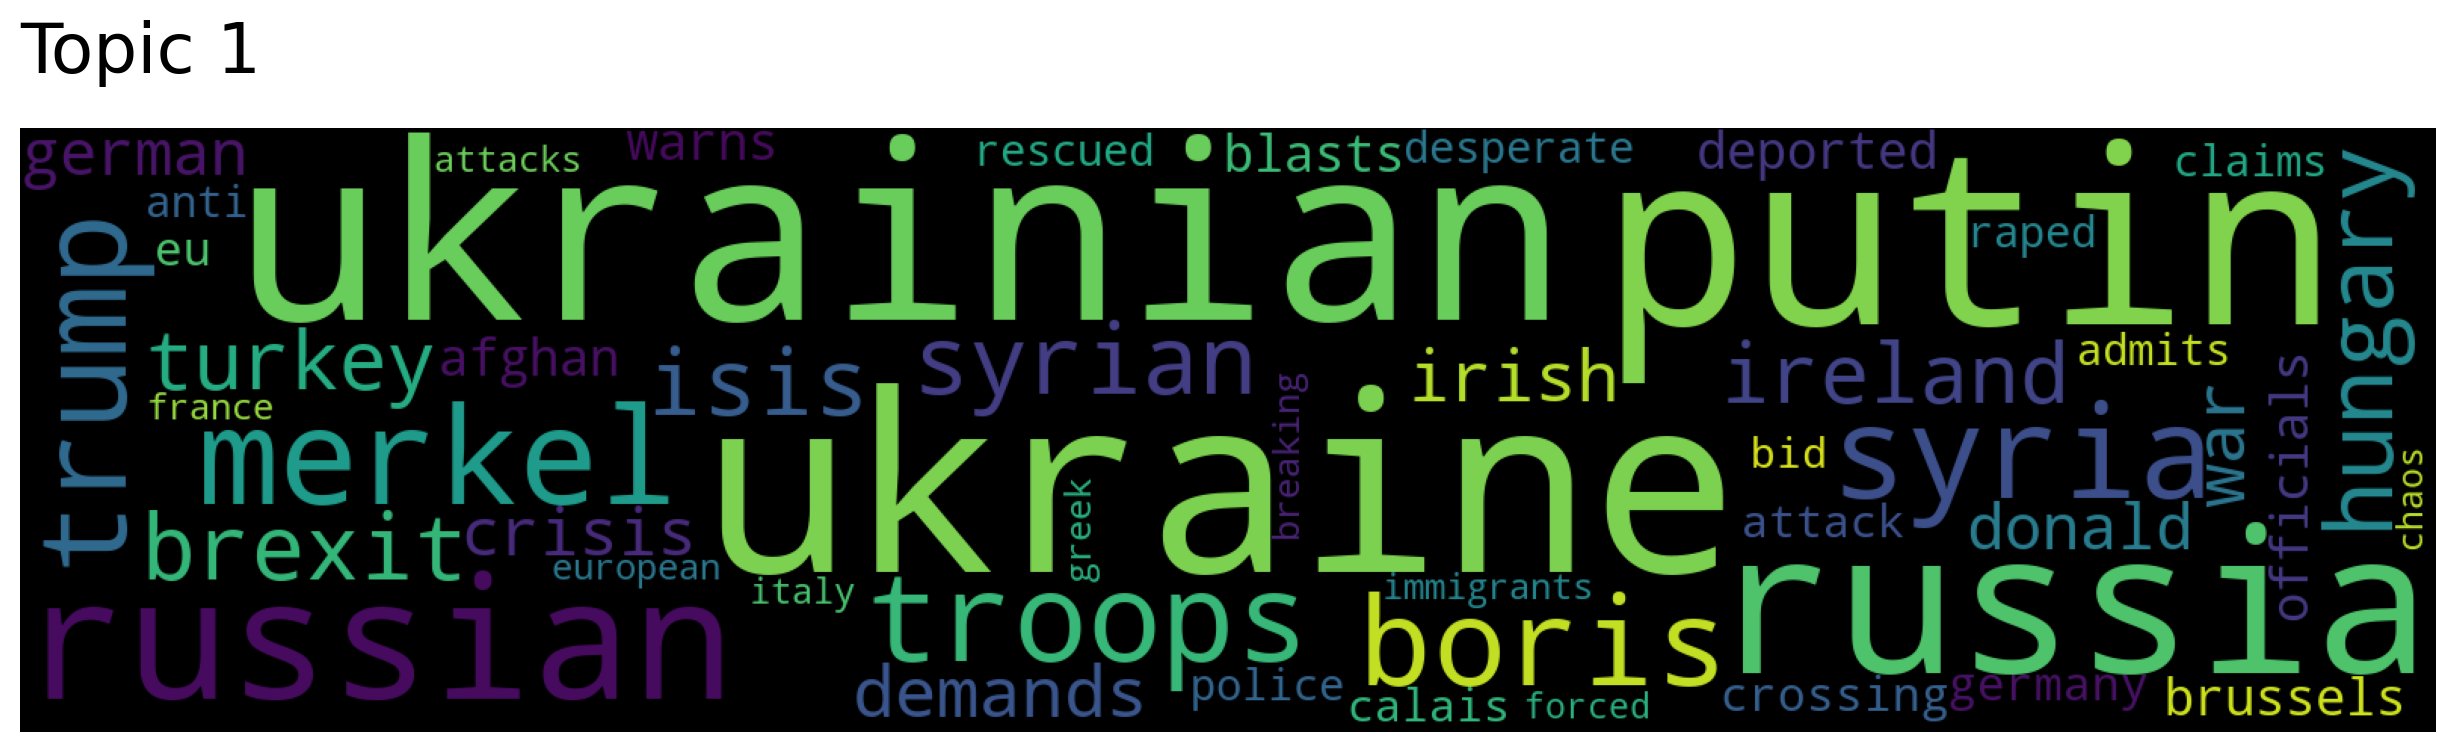

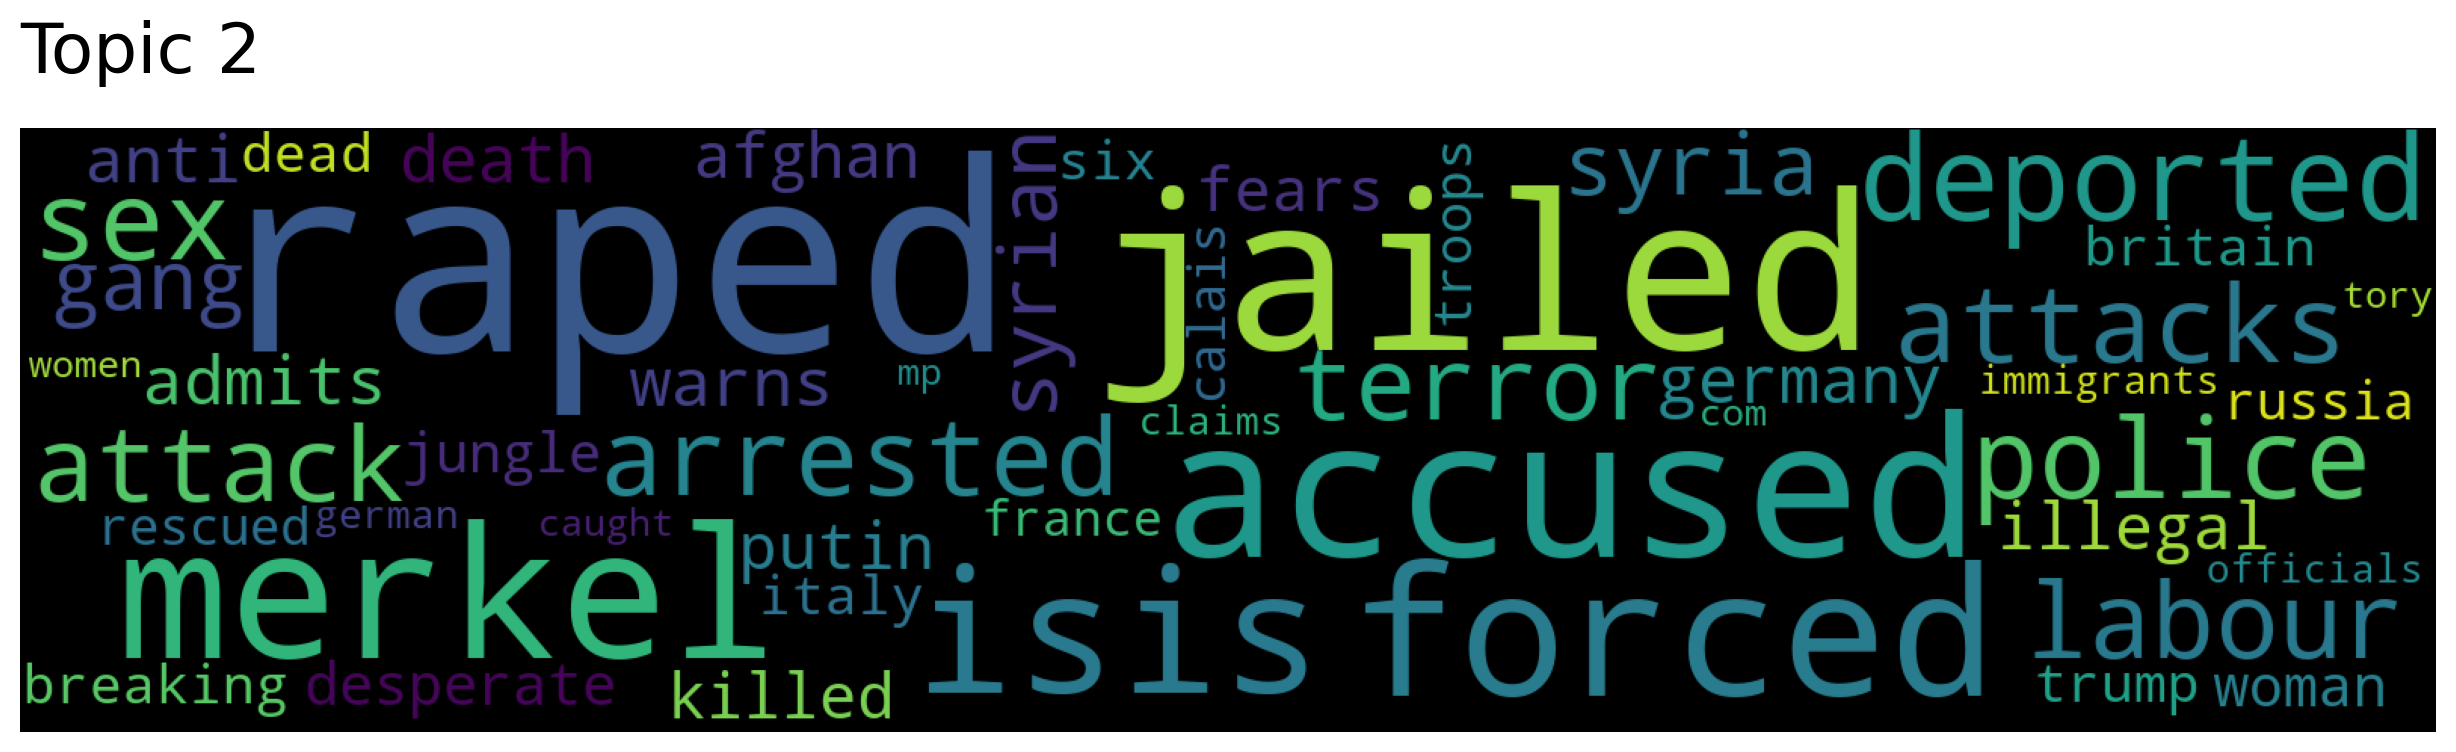

In [44]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["ukraine"], num_topics=5, reduced=True)
for topic in topic_nums:
    model_5.generate_topic_wordcloud(topic)

find number of documents associated with topics